### US ACCIDENTS Analysis

This is a countrywide car accident dataset that covers **49 states of the USA.** The accident data were collected from **February 2016 to March 2023**, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately **7.7 million** accident records.

US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, or studying the impact of precipitation or other environmental stimuli on accident occurrence.



Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading Data Set

In [3]:
df=pd.read_csv("US_Accidents_March23.csv")

Understanding Data 

In [4]:
df.head()#Returns first five rows of dataset 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.tail()#returns last 5 rows of dataset

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.shape #shape of data

(7728394, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


**Lets deep drive into EDA process**

Data Cleaning

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)

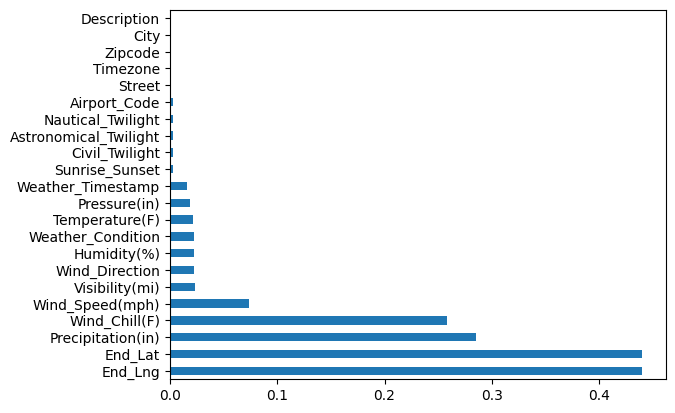

In [11]:
missing_percentage[missing_percentage!=0].plot(kind='barh')
plt.show()

We didn't consider those columns which are about more than 50% 

In [12]:
df.duplicated().sum()

np.int64(0)

hence there are no duplicated rows!


Columns we use
1. start time 
2. start lag
3. start lat
4. temp
5. whether condition
6. city
7. state


# Data Analysis

In [13]:
city=df.City.unique()

In [14]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

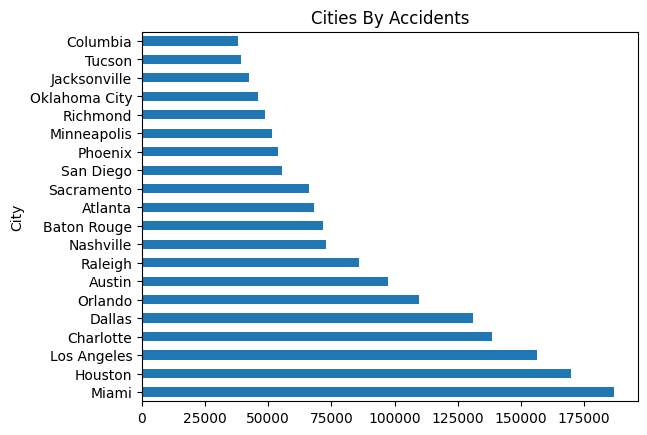

In [71]:
cities_by_accidents[:20].plot(kind='barh')
plt.title("Cities By Accidents")
plt.show()

In [16]:
'NY'in df.State

False

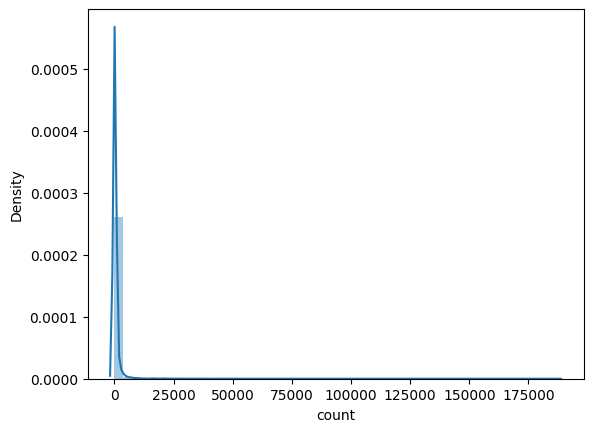

In [17]:
sns.distplot(cities_by_accidents)
plt.show()

In [18]:
high_accident_cities=cities_by_accidents[cities_by_accidents>1000]

In [19]:
low_accident_cities=cities_by_accidents[cities_by_accidents<1000]

In [20]:
len(high_accident_cities)/len(city)

0.08882228233057972

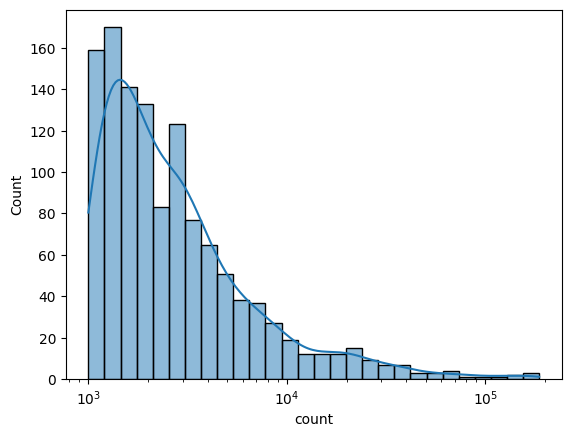

In [21]:
sns.histplot(high_accident_cities, log_scale=True,kde=True)
plt.show()

In [22]:
cities_by_accidents[cities_by_accidents==1]

City
American Fork-Pleasant Grove    1
Berlin township                 1
District 1 Abingdon             1
Selby                           1
Smackover                       1
                               ..
Saint Croix                     1
Masardis                        1
Okaton                          1
Wasta                           1
Adell                           1
Name: count, Length: 1023, dtype: int64

In [23]:
#Start time

In [24]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

This is currently a String we will convert it into datetime

In [25]:
df.Start_Time=pd.to_datetime(df.Start_Time,format='mixed')

In [26]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [27]:
h=df.Start_Time.dt.hour

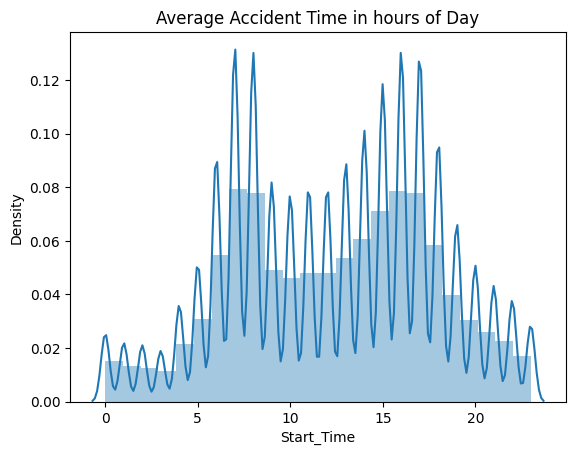

In [72]:
sns.distplot(df.Start_Time.dt.hour,bins=24,norm_hist=True)
plt.title("Average Accident Time in hours of Day")
plt.show()

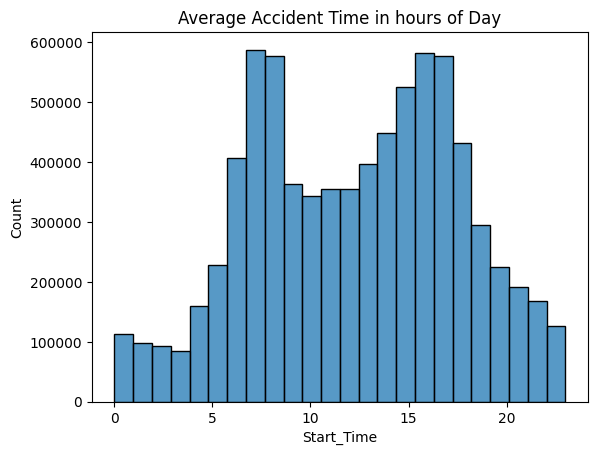

In [73]:
sns.histplot(df.Start_Time.dt.hour,bins=24)
plt.title("Average Accident Time in hours of Day")
plt.show()

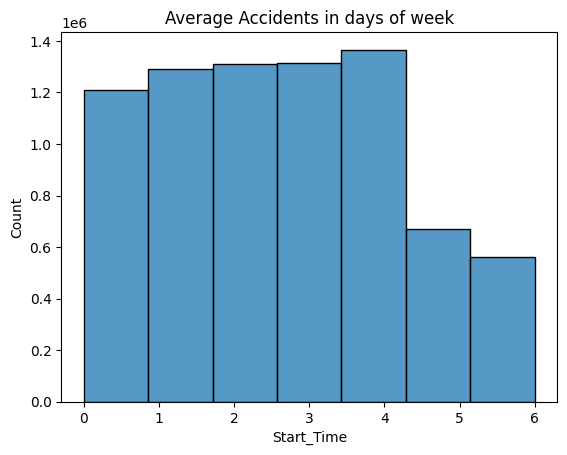

In [74]:
sns.histplot(df.Start_Time.dt.day_of_week,bins=7)
plt.title("Average Accidents in days of week")
plt.show()

In weekends, the distribution of hourly accidents is similar to weekdays? 

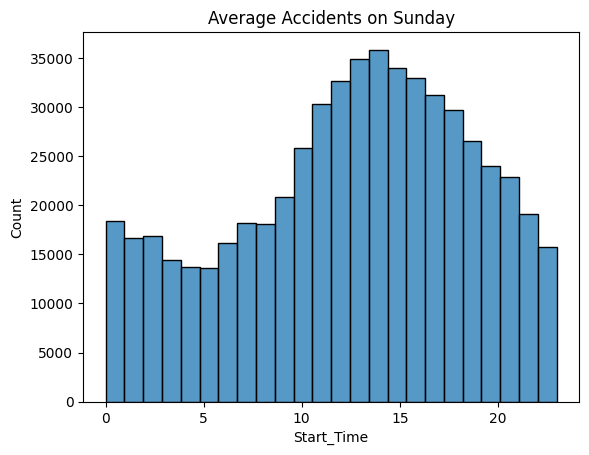

In [81]:
df_time_sunday=df.Start_Time[df.Start_Time.dt.day_of_week==6]
sns.histplot(df_time_sunday.dt.hour,bins=24)
plt.title("Average Accidents on Sunday")
plt.show()

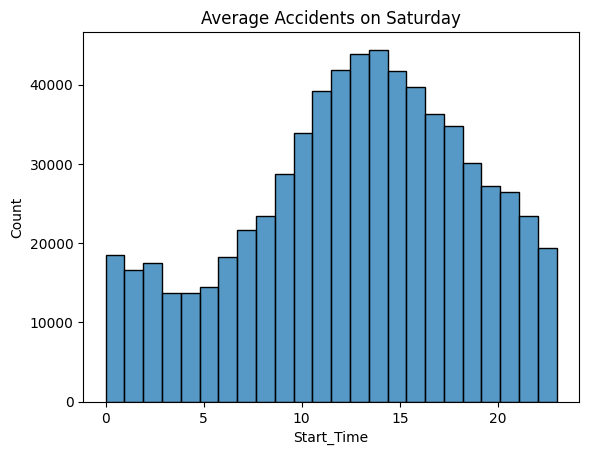

In [82]:
df_time_saturday=df.Start_Time[df.Start_Time.dt.day_of_week==5]
sns.histplot(df_time_saturday.dt.hour,bins=24)
plt.title("Average Accidents on Saturday")
plt.show()

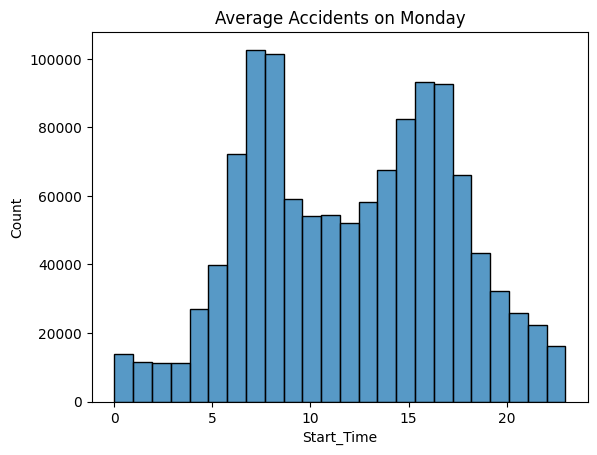

In [83]:
df_time_monday=df.Start_Time[df.Start_Time.dt.day_of_week==0]
sns.histplot(df_time_monday.dt.hour,bins=24)
plt.title("Average Accidents on Monday")
plt.show()

In [34]:
m=df.Start_Time.dt.month

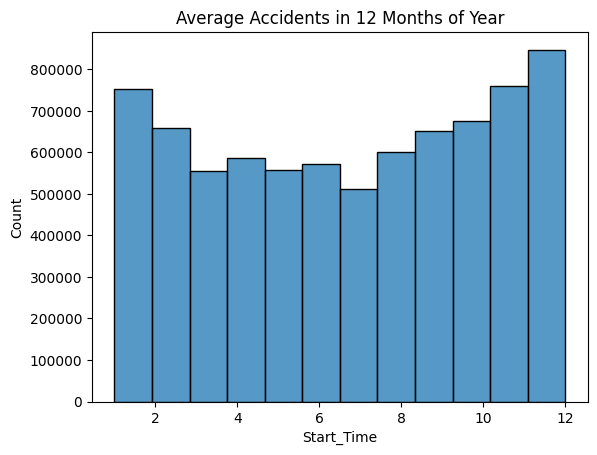

In [84]:
sns.histplot(m,bins=12)
plt.title("Average Accidents in 12 Months of Year")
plt.show()

In [36]:
# Tempareature

In [37]:
grouped_data = df.groupby('Temperature(F)').size().reset_index(name='accident_count')

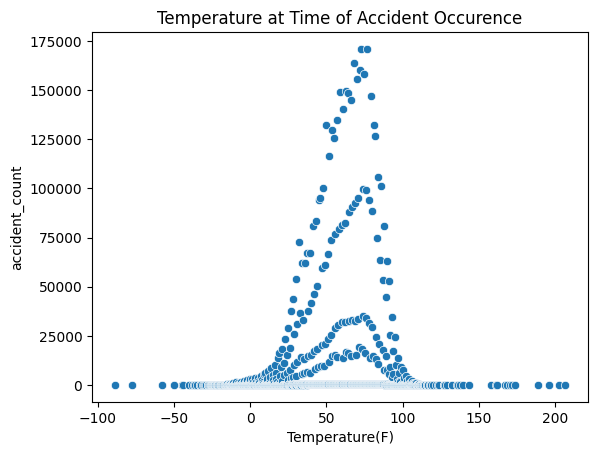

In [86]:
sns.scatterplot(data=grouped_data, x='Temperature(F)', y='accident_count')
plt.title("Temperature at Time of Accident Occurence")
plt.show()

In [39]:
# Wheather Condition

In [40]:
df.Weather_Condition.value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [52]:
weather_conditions = df.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                 189
Blowing Dust / Windy         266
Blowing Sand                   2
Blowing Snow                 740
Blowing Snow / Windy         925
                           ...  
Volcanic Ash                  22
Widespread Dust              181
Widespread Dust / Windy       24
Wintry Mix                 11703
Wintry Mix / Windy           331
Name: ID, Length: 144, dtype: int64

In [53]:
weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Heavy Smoke                          1
Heavy Freezing Rain / Windy          1
Heavy Rain Shower / Windy            1
Sand / Windy                         1
Partial Fog / Windy                  1
Name: ID, Length: 144, dtype: int64

In [54]:
weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Name: ID, dtype: int64

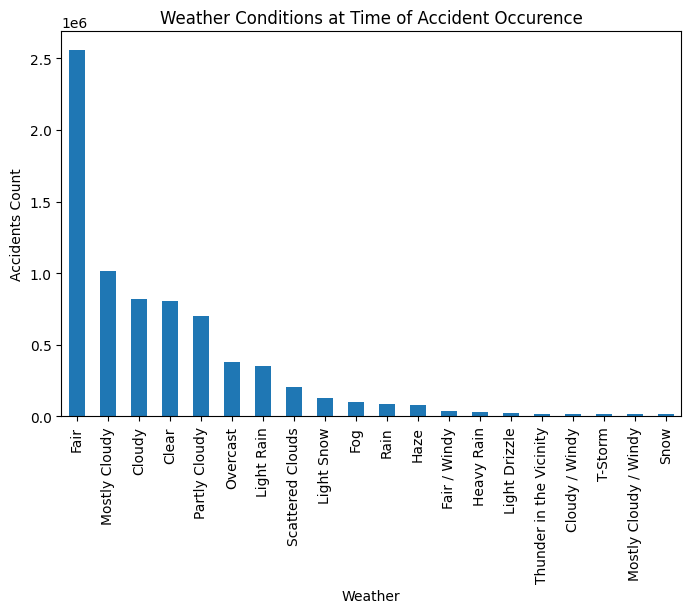

In [ ]:
# Let's visualize top 20 weather conditions at the time of accident occurence

fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()


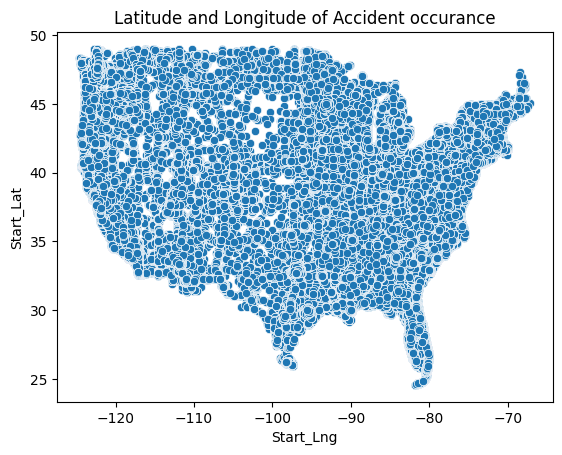

In [87]:
sns.scatterplot(df,x="Start_Lng",y="Start_Lat")
plt.title("Latitude and Longitude of Accident occurance")
plt.show()

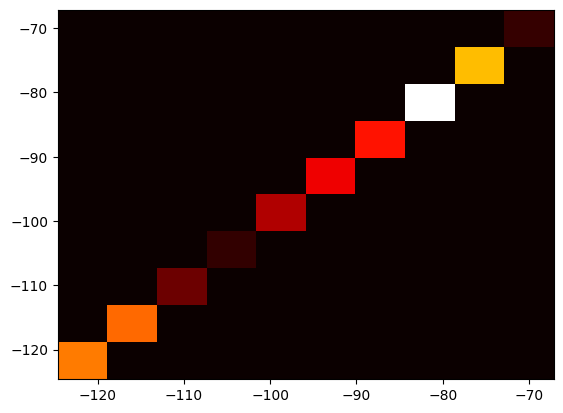

In [44]:
plt.hist2d(df.Start_Lng,df.Start_Lng,cmap="hot")
plt.show()

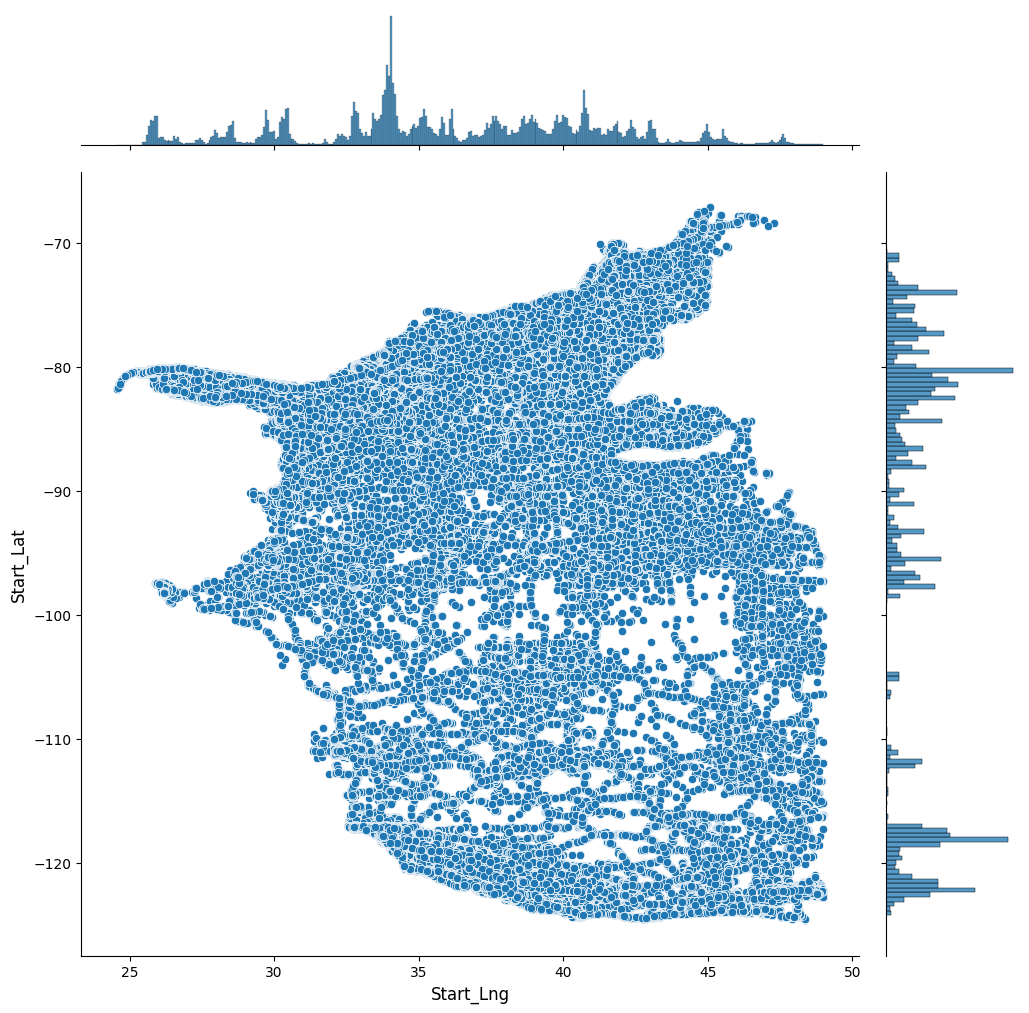

In [48]:
sns.jointplot(x=df.Start_Lat.values,y=df.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

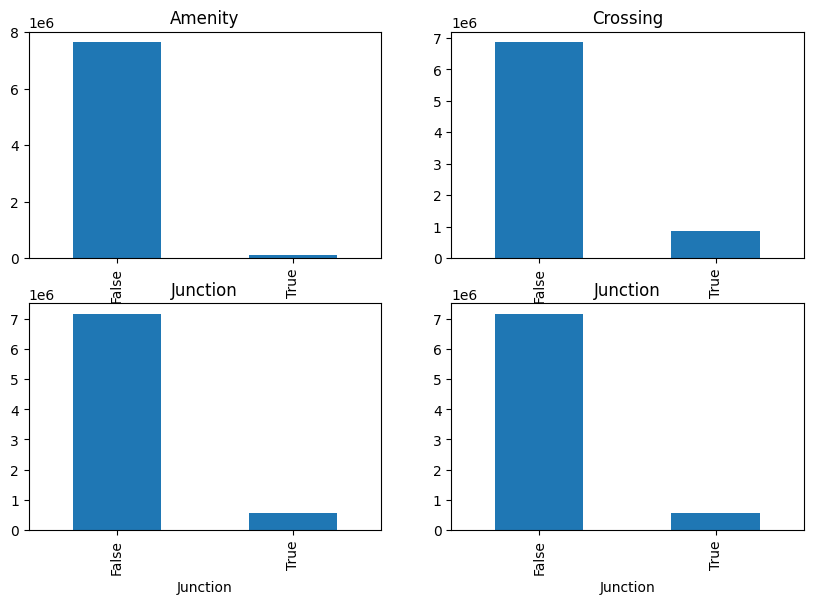

In [88]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


plt.subplot2grid(fig_dims, (0, 0))
df['Amenity'].value_counts().plot(kind='bar', 
                                     title='Amenity')
plt.subplot2grid(fig_dims, (0, 1))
df['Crossing'].value_counts().plot(kind='bar', 
                                     title='Crossing')
plt.subplot2grid(fig_dims, (1, 0))
df['Junction'].value_counts().plot(kind='bar', 
                                     title='Junction')
plt.subplot2grid(fig_dims, (1, 1))
df['Junction'].value_counts().plot(kind='bar', 
                                     title='Junction')
plt.show()

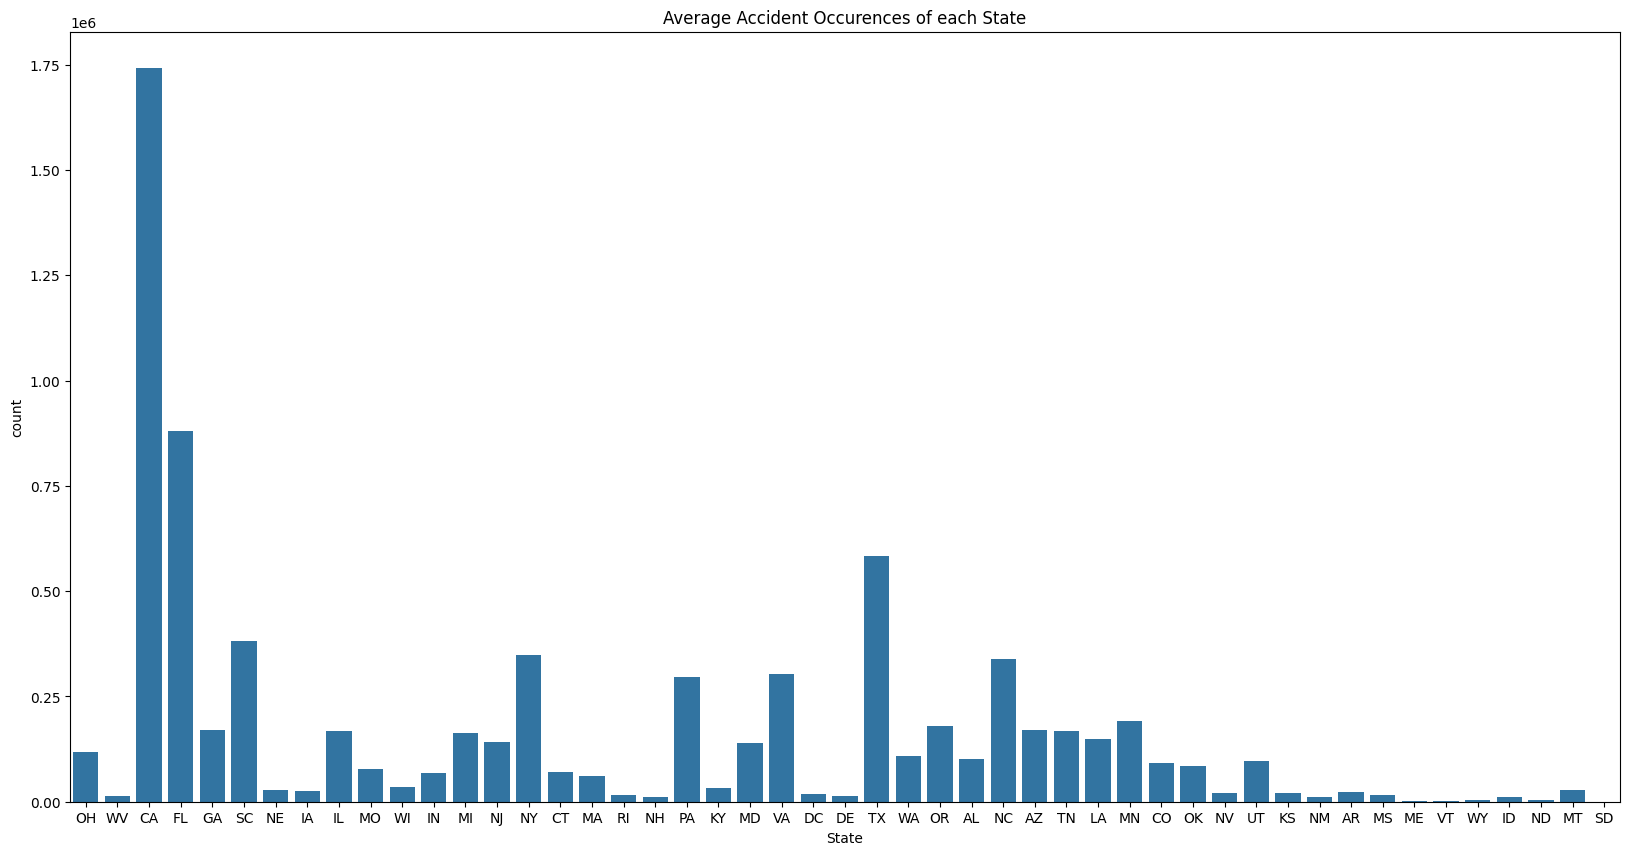

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="State")
plt.title("Average Accident Occurences of each State")
plt.show()

In [67]:
s=df.groupby(["State"]).count()["ID"]

In [68]:
s.value_counts(ascending=False)[:5]

ID
101044     1
22780      1
170609     1
1741433    1
90885      1
Name: count, dtype: int64

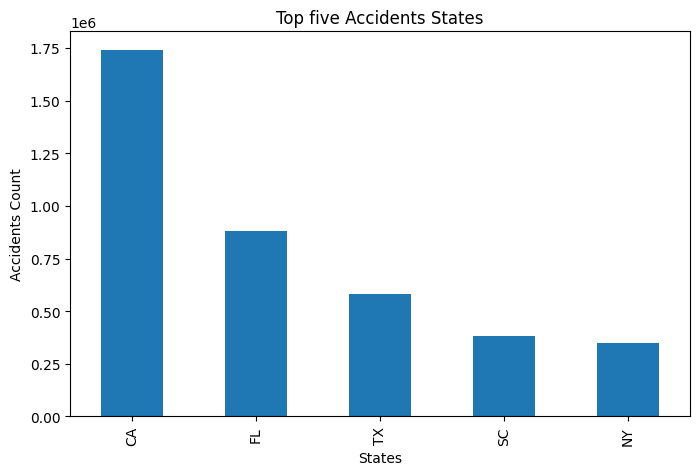

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
s.sort_values(ascending=False)[:5].plot(kind='bar')
ax.set(title = 'Top five Accidents States',
       xlabel = 'States',
       ylabel = 'Accidents Count')
plt.show()

# Questions Asked for Analysis
1. which state will effected more number of accidents ?
2. Does the more accidents happened in warmer temperature areas or colder areas?
3. what are top 5 effected states?
4. Does Newyork is in data?If yes why does it is low in that high populated city?
5. what time of the day does the accidents occur very Frequently?
6. Which days of the week has been with the most no. of accidents?
7. Which months has the most accidents?
8. What is the trend of accidents year by year?(increasing or decreasing)?
9. when is accidents per unit of traffic the highest?


## Insights

* California has effected more accidents among all other states

* California, Florida, Texas, South Carolina, New York are the top five states that are effected by accidents

* Miami City is most effected city

* There is a place of Newyork in data set.New York's low ranking in U.S. accident rates, despite its high population and traffic, is likely due to a combination of factors, including a relatively low rate of vehicle ownership in the city, leading to a lower fatality rate per capita compared to states where more people rely on cars.

* Less than 8% of Cities have morethan 1000 accidents"

* The Number of Accidents per city decreases Exponentially

* Over 1000 Cities have reported only one accident

* More accidents are 

* The more accidents are happended between 7 AM to 8 AM and 03 PM to 05 PM (Probably people are getting hurry in get to their work and getback from their work)

* On weekdays the more accidents are occured than weekends

* Unlike the average accidents that occur hourly during weekends are most effected between 10 AM to 8 PM

* In Winter the percentage of accidents are more than the accidents in the Summer!

* The number of accidents tends to be higher at moderate temperatures, roughly between 50 and 75 degrees Fahrenheit

* More Accidents are happened in wheather conditions like Fair, Mostly Cloudy, Cloudy, Clear, Partly Cloudy